**Initialize the Datasets for Megaline Data**

In [816]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats as st
%matplotlib inline

## Step 1. Open the dataset

Open the data file and study the general information
File path:
/datasets/games.csv . Download dataset

In [817]:
path = '/datasets/'
path1 = path + 'games.csv'
df_games = pd.read_csv(path1 ,sep=',')

## Step 2. Prepare the Data


*   Replace the column names (make them lowercase).

*   Convert the data to the required types.

*   Describe the columns where the data types have been changed and why.

*   If necessary, decide how to deal with missing values:


> *   Explain why you filled in the missing values as you did or why you decided to leave them blank.
> *   Why do you think the values are missing? Give possible reasons.
> *   Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

*   Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [818]:
df_games.columns= df_games.columns.str.lower()
display('SHAPE',df_games.shape)

df_games.info()

'SHAPE'

(16715, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**CONCLUSION**

Datatypes: year of release should be changed to int or timedate year

In [819]:
tmp_miss = pd.DataFrame()
tmp_miss['nans'] = df_games.isnull().sum()
tmp_miss['nan_percent'] = tmp_miss['nans']* 100/len(df_games)
tmp_miss

,nans,nan_percent
name,2,0.011965
platform,0,0.000000
year_of_release,269,1.609333
genre,2,0.011965
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8578,51.319174
user_score,6701,40.089740


**Conclusion**

Datatypes: year of release should be changed to int or timedate year

2 records have "name", genre missing. Need to check if same records.

critic_score: 51% values missing. Can't be filled

user_score: 40% records missing. Can't be filled with random values. User score has 'tbd' which should be changed to NaN because for analysis, 'tbd' is not adding value.

rating: 40% records missing data. Can't be filled.

This missing data is reasonable because many people who purchase don't submit reviews. I myself don't submit reviews or rating for products that I buy. 

Also, users who mostly submit scores are either very happy with the product or totally frustrated. We will see this as we further evaluate.

In [820]:
display(df_games.head(5), df_games.tail(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [821]:
#Convert data to required types

#year_of_release to integer, replaced NaN with -1
#df_games['year_of_release'] = df_games.year_of_release.fillna(-1).astype(int)

#critic_score to float
df_games['critic_score'] = df_games['critic_score'].astype(float)
display(df_games['year_of_release'], df_games['critic_score'])

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: critic_score, Length: 16715, dtype: float64

In [822]:
#map(lambda x : df_games[x].value_counts(), df_games.columns)
for c in df_games.columns: display(df_games[c].value_counts().to_frame())

,name
Need for Speed: Most Wanted,12
LEGO Marvel Super Heroes,9
Ratatouille,9
FIFA 14,9
Madden NFL 07,9
...,...
Blood of Bahamut,1
Musou Orochi Z,1
Bigfoot King of Crush,1
Aquapazza: Aquaplus Dream Match,1


,platform
PS2,2161
DS,2151
PS3,1331
Wii,1320
X360,1262
PSP,1209
PS,1197
PC,974
XB,824
GBA,822


,year_of_release
2008.0,1427
2009.0,1426
2010.0,1255
2007.0,1197
2011.0,1136
2006.0,1006
2005.0,939
2002.0,829
2003.0,775
2004.0,762


,genre
Action,3369
Sports,2348
Misc,1750
Role-Playing,1498
Shooter,1323
Adventure,1303
Racing,1249
Platform,888
Simulation,873
Fighting,849


,na_sales
0.00,4508
0.02,576
0.03,561
0.04,549
0.01,545
...,...
4.98,1
4.21,1
6.82,1
5.05,1


,eu_sales
0.00,5870
0.01,1494
0.02,1308
0.03,926
0.04,709
...,...
3.59,1
4.02,1
2.24,1
2.27,1


,jp_sales
0.00,10514
0.02,741
0.01,706
0.03,546
0.04,397
...,...
1.16,1
2.12,1
7.20,1
2.17,1


,other_sales
0.00,6601
0.01,3464
0.02,1618
0.03,926
0.04,654
...,...
0.96,1
1.93,1
0.97,1
1.37,1


,critic_score
70.0,256
71.0,254
75.0,245
78.0,240
73.0,238
...,...
20.0,3
17.0,1
22.0,1
13.0,1


,user_score
tbd,2424
7.8,324
8,290
8.2,282
8.3,254
...,...
0.3,2
0.6,2
0.5,2
9.7,1


,rating
E,3990
T,2961
M,1563
E10+,1420
EC,8
RP,3
K-A,3
AO,1


In [823]:
df_missing = df_games.query('name.isna() and genre.isna()',engine='python')
df_missing

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [824]:
df_games.query('year_of_release == 1993 and platform == "GEN"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [825]:
values = {'name': 'unknown', 'genre': 'unknown'}
df_games.fillna(value=values, inplace=True)
df_games[df_games['name']=='unknown']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993.0,unknown,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993.0,unknown,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**CONCLUSION**

Replaced name, genre with 'unknown' for Nan Values (only two rows). I didn't remove these records because they have sales associated with them.

In [826]:
#Filling rating values using games with same name
rating_value = df_games.dropna().groupby('name')['rating'].first().to_dict()
df_games['old_rating']=df_games['rating']

In [827]:
df_games.rating = df_games.rating.fillna(df_games.name.map(rating_value))
print(df_games.old_rating.isnull().sum(),df_games.rating.isnull().sum())

6766 6405


**CONCLUSION**

Recovered rating using the rating for a similar game that has the rating available.
First I created a dictionary mapping of game name and rating.
Then I used this mapping to assign a rating where it was Nan (for the same game).

In [828]:
#Get missing values from existing data - year_of_release, critic_score, user_score, rating
#Can recover because we have platform info for all games
#Changed year_of_release Nan values to 0
#Made year_of_release as int
#Copied year_of_release into year_of_release_old
#Converted year_of_release 0 values to mean of the year_of_release values for that platform

gidx = ['platform']

print(df_games['year_of_release'].isnull().sum())
df_games['year_of_release']=df_games['year_of_release'].fillna(0).astype(int)
display(df_games[df_games['year_of_release']==0][['platform','year_of_release']])

def fill_with_mask(s):
    mean = s.loc[lambda x: x != 0].mean().astype(int)
    return s.mask(s.eq(0), mean)

df_games['year_of_release_old'] = df_games['year_of_release']
df_games['year_of_release']=df_games.groupby(gidx)['year_of_release'].apply(fill_with_mask)
display(df_games[df_games['year_of_release_old']==0][['platform','year_of_release','year_of_release_old']])

269


,platform,year_of_release
183,PS2,0
377,PS2,0
456,Wii,0
475,PS2,0
609,2600,0
...,...,...
16373,PSP,0
16405,GC,0
16448,PC,0
16458,PS3,0


,platform,year_of_release,year_of_release_old
183,PS2,2004,0
377,PS2,2004,0
456,Wii,2008,0
475,PS2,2004,0
609,2600,1982,0
...,...,...,...
16373,PSP,2008,0
16405,GC,2003,0
16448,PC,2008,0
16458,PS3,2010,0


**CONCLUSION: year_of_release Nan values**

* Filled year_of_release Nan values with mean of year_of_release for that platform.
* Get missing values from existing data - year_of_release, critic_score, user_score, rating.
* Can recover because we have platform info for all games.
* Changed year_of_release Nan values to 0
* Made year_of_release as int
* Copied year_of_release into year_of_release_old
* Converted year_of_release 0 values to mean of the year_of_release values for that platform

In [829]:
# convert column "user_score" to float
df_games = df_games.replace('tbd', np.nan)
df_games['user_score'] = df_games.user_score.astype(float) * 10
df_games['user_score'].value_counts()
df_games.user_score.isnull().sum()

9125

**Conclusion**

user_score is tbd in 2424 records, which is approximately 14% of total records. 

This may be that users just bought the item and the seller is expecting them to report a rating in the next 1 month. The sellers usually send emails for a few weeks to the customers to get their feedback.

The TBD may be that timeperiod. Will check below on which year has the most tbds. 

For further analysis, I will change 'tbd' to 'nan', then convert user_score to float. 

Also user_score is in range of 0-10, whereas critic_score is in range of 0-100. Converted to 0-100 by multiplying with 10.

Now we have user_score tbd removed, changed to float, and it has the same numeric range of 0-100 as critic_score.

In [830]:
#Recover critic_score, user_score
#Finding out which correlation can help recover these scores
df_games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,year_of_release_old
year_of_release,1.000000,-0.093319,0.004581,-0.165479,0.038210,0.011024,-0.265766,0.053552
na_sales,-0.093319,1.000000,0.765335,0.449594,0.638649,0.240755,0.086200,0.004704
eu_sales,0.004581,0.765335,1.000000,0.435061,0.722792,0.220752,0.055337,0.013842
jp_sales,-0.165479,0.449594,0.435061,1.000000,0.291089,0.152593,0.125598,0.017939
other_sales,0.038210,0.638649,0.722792,0.291089,1.000000,0.198554,0.057119,0.011372
critic_score,0.011024,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878,0.013955
user_score,-0.265766,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000,0.002169
year_of_release_old,0.053552,0.004704,0.013842,0.017939,0.011372,0.013955,0.002169,1.000000


In [831]:
#Recover user_score by critic_score
df_games['factor'] = pd.cut(df_games['critic_score'], 10)

#display(df_games)

critic_to_mean = df_games.groupby('factor')['critic_score'].mean().astype(int).to_dict()
#print(critic_to_mean)

def filler(row):
    if ((np.isnan(row['user_score'])) & (~np.isnan(row['critic_score']))):
        tmp1 = critic_to_mean.get(row["factor"])
        return tmp1
    return row["user_score"]
 
df_games['old_user_score'] = df_games['user_score']

df_games["user_score"] = df_games.apply(filler, axis=1)

tmp = df_games[ (df_games['old_user_score'].isnull()) & (df_games['critic_score'].notna())][['user_score','critic_score','old_user_score','factor']]
print(df_games['old_user_score'].isnull().sum(), df_games['user_score'].isnull().sum())

display(tmp)

9125 8005


,user_score,critic_score,old_user_score,factor
182,84.0,85.0,NaN,"(81.0, 89.5]"
301,60.0,61.0,NaN,"(55.5, 64.0]"
440,84.0,88.0,NaN,"(81.0, 89.5]"
637,84.0,83.0,NaN,"(81.0, 89.5]"
645,68.0,71.0,NaN,"(64.0, 72.5]"
...,...,...,...,...
16577,43.0,40.0,NaN,"(38.5, 47.0]"
16669,68.0,72.0,NaN,"(64.0, 72.5]"
16695,68.0,67.0,NaN,"(64.0, 72.5]"
16697,51.0,53.0,NaN,"(47.0, 55.5]"


**CONCLUSION **

1120 rows of user_score (which had Nan values) are filled from critic_score.

In [832]:
#Recover critic_score by user_score

df_games['factor_user'] = pd.cut(df_games['user_score'], 10)

user_to_mean = df_games.groupby('factor_user')['user_score'].mean().astype(int).to_dict()
#print(user_to_mean)

def filler_critic(row):
    if ((np.isnan(row['critic_score'])) & (~np.isnan(row['user_score']))):
        tmp1 = user_to_mean.get(row["factor_user"])
        return tmp1
    return row["critic_score"]
 
df_games['old_critic_score'] = df_games['critic_score']

df_games["critic_score"] = df_games.apply(filler_critic, axis=1)

tmp = df_games[ (df_games['old_critic_score'].isnull()) & (df_games['user_score'].notna())][['user_score','critic_score','old_critic_score','factor_user']]


display(tmp)

,user_score,critic_score,old_critic_score,factor_user
255,48.0,43.0,NaN,"(38.8, 48.5]"
263,49.0,53.0,NaN,"(48.5, 58.2]"
264,45.0,43.0,NaN,"(38.8, 48.5]"
291,82.0,82.0,NaN,"(77.6, 87.3]"
359,62.0,62.0,NaN,"(58.2, 67.9]"
...,...,...,...,...
16636,75.0,72.0,NaN,"(67.9, 77.6]"
16643,66.0,62.0,NaN,"(58.2, 67.9]"
16654,51.0,53.0,NaN,"(48.5, 58.2]"
16661,80.0,82.0,NaN,"(77.6, 87.3]"


**CONCLUSION**

573 rows of critic_score (which had Nan values) are filled from user_score.

In [833]:
tmp_miss['new_nans'] = df_games.isnull().sum()
tmp_miss['new_nan_percent'] = tmp_miss['new_nans']* 100/len(df_games)

display(tmp_miss)

,nans,nan_percent,new_nans,new_nan_percent
name,2,0.011965,0,0.000000
platform,0,0.000000,0,0.000000
year_of_release,269,1.609333,0,0.000000
genre,2,0.011965,0,0.000000
na_sales,0,0.000000,0,0.000000
eu_sales,0,0.000000,0,0.000000
jp_sales,0,0.000000,0,0.000000
other_sales,0,0.000000,0,0.000000
critic_score,8578,51.319174,8005,47.891116
user_score,6701,40.089740,8005,47.891116


**CONCLUSION**

year_of_release, filled all 269 missing values
genre                 2
critic_score, filled 573 missing values, out of a total of 8578 missing, we now have only 8005 missing.
user_score, filled 1120 missing values, out of a total of 9125 missing, we now have only 8005 missing. user score also had 2424 'tbd' which was converted to Nan and then was recovered.

In [834]:
df_no_sale = df_games.query('na_sales==0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')
df_no_sale

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,old_rating,year_of_release_old,factor,old_user_score,factor_user,old_critic_score
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN


**CONCLUSION**

No sales of these products, no ratings or score.

In [835]:
#Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,old_rating,year_of_release_old,factor,old_user_score,factor_user,old_critic_score,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,E,2006,"(72.5, 81.0]",80.0,"(77.6, 87.3]",76.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,1985,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,E,2008,"(81.0, 89.5]",83.0,"(77.6, 87.3]",82.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,E,2009,"(72.5, 81.0]",80.0,"(77.6, 87.3]",80.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,1996,NaN,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,2006,NaN,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,2003,NaN,NaN,NaN,NaN,0.01


**CONCLUSION**

Calculated the total sales (the sum of sales in all regions) for each game and put these values in a separate column called 'total_sales'

## Step 3. Analyze the Data

Look at how many games were released in different years. Is the data for every period significant?

Look at how sales varied from platform to platform. 

Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. 

How long does it generally take for new platforms to appear and old ones to fade?

Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

Work only with the data that you've decided is relevant. Disregard the data for previous years.

Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Keeping your conclusions in mind, compare the sales of the same games on other platforms.

Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

[Text(0, 0.5, 'Distribution of games'),
 Text(0.5, 0, 'year_of_release'),
 Text(0.5, 1.0, 'Game distribution over the years')]

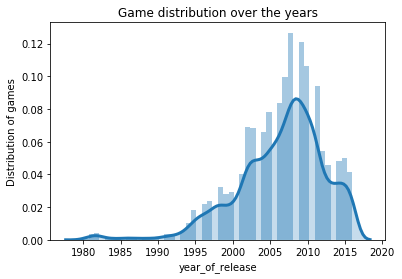

In [836]:
#Look at how many games were released in different years. Is the data for every period significant?
df_games_years = df_games[['year_of_release','name']]
df_year_stats = df_games_years.pivot_table(index='year_of_release',aggfunc=['count'])
df_year_stats.columns = ['count']
df_year_stats[df_year_stats['count']>500]
ax=sns.distplot(df_games_years['year_of_release'],hist = True,kde = True,kde_kws = {'shade': True, 'linewidth': 3})
ax.set(ylabel='Distribution of games', xlabel='year_of_release',title='Game distribution over the years')

**CONCLUSION**

500 or more games sold from 2002 onwards.
Sales were most in 2009 - 2011
Very low volume till 1995. Not many video games were available at that time.

In [837]:
#Look at how sales varied from platform to platform.
df_platform_stats = df_games.pivot_table(index='platform',values=['total_sales'],aggfunc=['sum'])
df_platform_stats.columns=['total_sales']
df_platform_stats_500 = df_platform_stats.query('total_sales > 350').sort_values(by='total_sales',ascending=False)
display(df_platform_stats_500)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


**CONCLUSION:**

Platforms that had most sales are listed above.


In [838]:
#Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
high_platform = df_platform_stats_500.index
high_platform.values
df_highest_sale = df_games[df_games.platform.isin(high_platform.values)][['year_of_release','total_sales','platform']]
df_highest_stats = df_highest_sale.pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc='sum')
display(df_highest_stats)

total_sales
platform year_of_release             
DS       1985                    0.02
         2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
...                               ...
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

[67 rows x 1 columns]

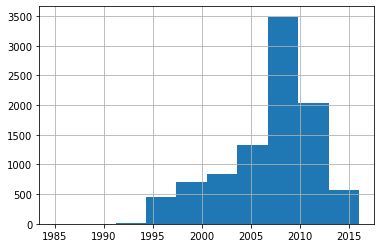

In [839]:
df_highest_sale['year_of_release'].hist()

**PIECHARTS**

PIE CHARTS for the yearly distribution of sales in  different platforms is depicted below.

In [840]:
df_highest_stats

total_sales
platform year_of_release             
DS       1985                    0.02
         2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
...                               ...
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

[67 rows x 1 columns]

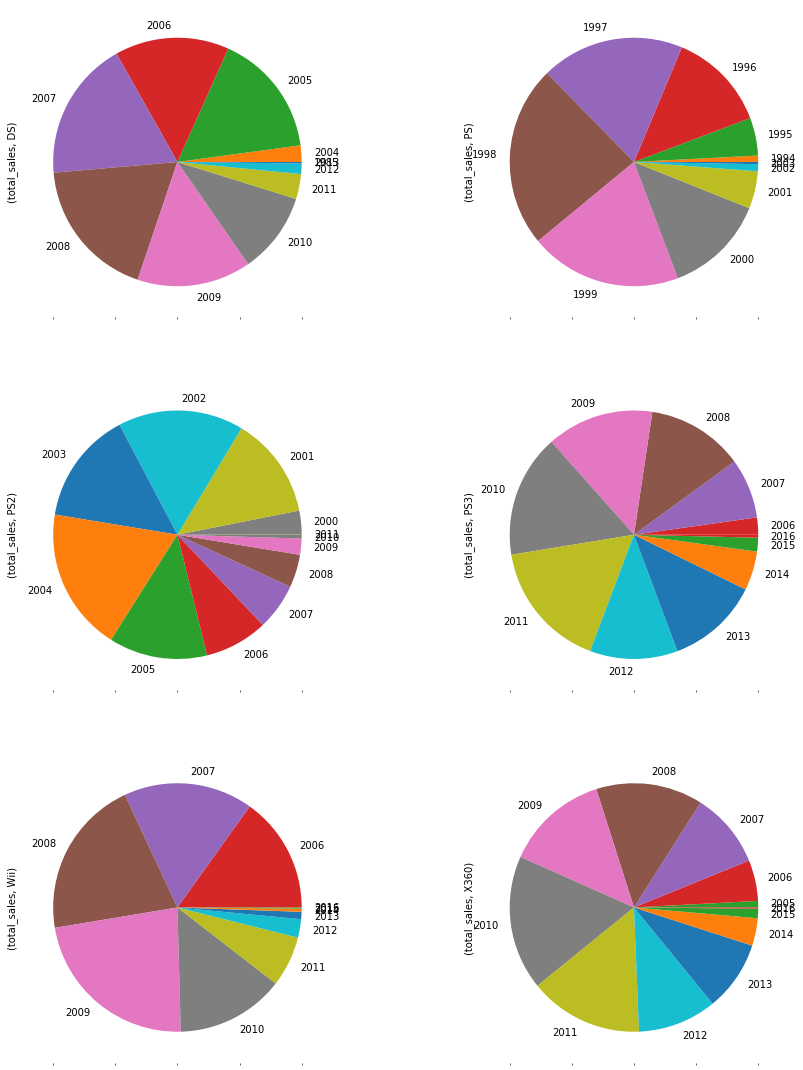

In [841]:
plot = df_highest_stats.unstack(level=0).plot.pie(subplots=True,figsize=(15, 40),layout=(6,2),legend=False);

In [842]:
#Plotted all the piecharts above laid out horizontally, commented the following working code
#tmp_stats = df_highest_stats.reset_index(level=1)

#for tmp_platform in high_platform.values:
#    print(tmp_platform)
#    tmp = tmp_stats.loc[tmp_platform]
#    plt.pie(tmp.total_sales, labels=tmp.year_of_release)
#    plt.title(tmp_platform)
#    plt.figsize=(11, 11)
#    plt.show()

In [843]:
#Find platforms that used to be popular but now have zero sales.
#df_games.fillna(value=values)
df_no_sale = df_games[df_games['total_sales']==0.0]
df_no_sale_platform = df_no_sale['platform']
display(df_no_sale)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,old_rating,year_of_release_old,factor,old_user_score,factor_user,old_critic_score,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN,0.0


**CONCLUSION**

Only two platforms have zero total_sales in 2008: PS2 and PS3.

In [844]:
df_games_with_sales = df_games[df_games['total_sales']!=0.0]
df_past_sale = df_games_with_sales[df_games_with_sales
                                   .platform
                                   .isin(df_no_sale_platform.values)][['platform','year_of_release','total_sales']]

display(df_past_sale)

,platform,year_of_release,total_sales
16,PS3,2013,21.05
17,PS2,2004,20.81
24,PS2,2002,16.15
28,PS2,2001,14.97
34,PS3,2012,13.79
...,...,...,...
16674,PS3,2014,0.01
16683,PS2,2008,0.01
16689,PS2,2008,0.01
16691,PS3,2016,0.01


In [845]:
df_ps2 = df_past_sale.query('platform=="PS2"')
df_ps2.sort_values(by=['total_sales'])

,platform,year_of_release,total_sales
16689,PS2,2008,0.01
16369,PS2,2007,0.01
16366,PS2,2008,0.01
16333,PS2,2008,0.01
16325,PS2,2007,0.01
...,...,...,...
48,PS2,2004,11.65
38,PS2,2001,13.10
28,PS2,2001,14.97
24,PS2,2002,16.15


[Text(0, 0.5, 'Distribution of games'),
 Text(0.5, 0, 'year_of_release'),
 Text(0.5, 1.0, 'Game distribution over the years')]

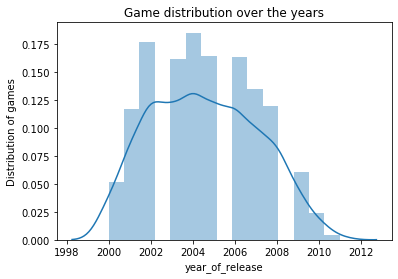

In [846]:
ax=sns.distplot(df_ps2['year_of_release'])

ax.set(ylabel='Distribution of games', xlabel='year_of_release',title='Game distribution over the years')

**CONCLUSION**

The distribution illustrates that the sales started going down for PS2 around 2007. This may be the time when PS3 was going to come.

The PS2 started selling in 2000 and peaked in 2002. Then the sale started going down in 2007, and eventually zeroing in 2010. 10 year cycle.

In [847]:
df_ps3 = df_past_sale.query('platform=="PS3"')
df_ps3.sort_values(by=['total_sales'])

,platform,year_of_release,total_sales
16710,PS3,2016,0.01
15649,PS3,2010,0.01
15880,PS3,2013,0.01
15891,PS3,2015,0.01
16104,PS3,2012,0.01
...,...,...,...
54,PS3,2010,10.70
41,PS3,2010,12.63
37,PS3,2011,13.33
34,PS3,2012,13.79


[Text(0, 0.5, 'Distribution of games'),
 Text(0.5, 0, 'year_of_release'),
 Text(0.5, 1.0, 'Game distribution over the years')]

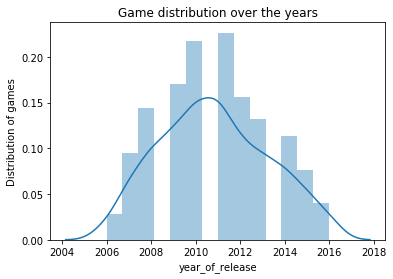

In [848]:
ax=sns.distplot(df_ps3['year_of_release'])

ax.set(ylabel='Distribution of games', xlabel='year_of_release',title='Game distribution over the years')

**CONCLUSION**

The distribution illustrates that the sales started going down for PS3 around 2012. This may be the time when next version was going to come. 

PS3 started selling in 2006, peaked in 2011, and dropped to almost zero in 2016. 10 year cycle.

**How long does it generally take for new platforms to appear and old ones to fade?**

Hence the products have approximately 10 year cycle from start to end, new version comes and the old one stops selling.

[Text(0, 0.5, 'Distribution of games'),
 Text(0.5, 0, 'year_of_release'),
 Text(0.5, 1.0, 'Game distribution over the years')]

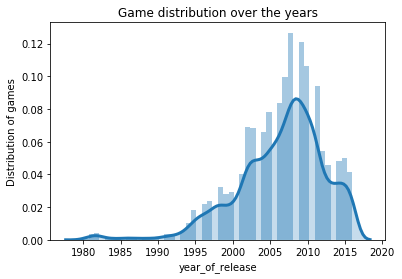

In [849]:
#Sampling of data for future analysis and conclusion

ax = sns.distplot(df_games_years['year_of_release'], hist = True,kde = True,kde_kws = {'shade': True, 'linewidth': 3})

ax.set(ylabel='Distribution of games', xlabel='year_of_release',title='Game distribution over the years')

In [850]:
#Work only with the data that you've decided is relevant. 
display(df_games.year_of_release.describe(), df_games.year_of_release.skew())
#calculate the 2-sigma range for the year_of_release
#mean-2sigma, mean+2sigma
mean_y = df_games.year_of_release.mean()
std_y = df_games.year_of_release.std()
high_val = mean_y + 2 * std_y
low_val = mean_y -2 * std_y
print (high_val, low_val)

count    16715.000000
mean      2006.461442
std          5.895494
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

-1.0127725339117424

2018.252428972769 1994.6704546646824


## **CONCLUSION**

The distribution plots, and the 2*sigma values show that we can take sampling from year_of_release 2005 onwards. Although he sales started rising in 1995, each platform seems to have a lifespan of 10 years (except Wii). We can then use this data to extrapolate for future years.

0.5059151279714195 count    10494.000000
mean      2010.033257
std          2.857180
min       2006.000000
25%       2008.000000
50%       2010.000000
75%       2012.000000
max       2016.000000
Name: year_of_release, dtype: float64


[Text(0, 0.5, 'Distribution of games'),
 Text(0.5, 0, 'year_of_release'),
 Text(0.5, 1.0, 'Game distribution over the years')]

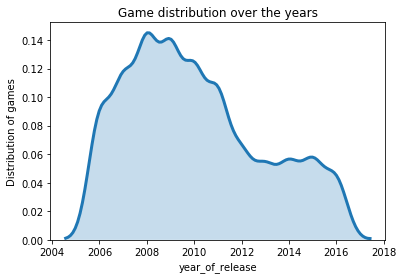

In [851]:
#Good to take data towards the game boom time, from 2005 onwards, when the games started picking up. I will use
df_games_sample = df_games.query('year_of_release >2005')
print(df_games_sample.year_of_release.skew(), df_games_sample.year_of_release.describe())
#Look at how many games were released in different years. Is the data for every period significant?
df_games_years = df_games_sample[['year_of_release','name']]
df_year_stats = df_games_years.pivot_table(index='year_of_release',aggfunc=['count'])
df_year_stats.columns = ['count']
df_year_stats[df_year_stats['count']>500]
ax=sns.distplot(df_games_years['year_of_release'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3})
ax.set(ylabel='Distribution of games', xlabel='year_of_release',title='Game distribution over the years')

**CONCLUSION**

Above sample shows the df_games dataset from year 1995 onwards. It also shows the skew number of year_of_release reduced from -.97 to -.27. Still left skewed but not a lot. We need to start from 1995 because some of the platforms that started in 1995 may still be growing and causing high sale volumes.

Disregarded the data prior to 1995.    


In [852]:
#Which platforms are leading in sales?
df_games_sample.total_sales.describe()
df_high_platforms_stats = (df_games_sample
                                     .pivot_table(index=['platform'],values='total_sales',aggfunc=sum)
                                     .query('total_sales>=100') 
                                      .sort_values(by='total_sales',ascending=False)
                                )
df_high_platforms_stats

,total_sales
platform,
X360,963.17
PS3,939.65
Wii,907.51
DS,658.69
PS4,314.14
PS2,265.80
3DS,259.00
PSP,243.15
PC,167.18


In [853]:
#df_high_platforms.index.isin(df_games_sample['platform'])
df_high_platforms = df_games_sample[df_games_sample['platform'].isin(df_high_platforms_stats.index)]
df_high_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,old_rating,year_of_release_old,factor,old_user_score,factor_user,old_critic_score,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,E,2006,"(72.5, 81.0]",80.0,"(77.6, 87.3]",76.0,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,E,2008,"(81.0, 89.5]",83.0,"(77.6, 87.3]",82.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,E,2009,"(72.5, 81.0]",80.0,"(77.6, 87.3]",80.0,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,E,2006,"(81.0, 89.5]",85.0,"(77.6, 87.3]",89.0,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,E,2006,"(55.5, 64.0]",66.0,"(58.2, 67.9]",58.0,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,E,2008,NaN,NaN,NaN,NaN,0.01
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,58.0,NaN,NaN,2009,"(55.5, 64.0]",58.0,"(48.5, 58.2]",63.0,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,0.01


**GROWING SHRINKING PLATFORMS**

The following series of cells will display how I approached the identification of Growing and Shrinking platforms.

I used the platforms which have sale > 100M

I find the platform sale per year 

Draw a bar chart to see distribution of sale per year for each platform.

Then I make a table of platform, first year, first year sale, last year, last year sale.

Compare last year sale with first year sale to see if platform is growing or shrinking.

For some platforms, the growing/shrinking based on first/last year may not be correct but it will tell that the platform is making more money in the last year than when it started.

In [854]:
df_high_platforms_y1 = (df_high_platforms
                                     .pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc=['sum'])
                                )

df_high_platforms_y1.columns=['yearly_sale']
idx = df_high_platforms_y1.index
idx.rename(['platform','year'],inplace=True)
df_high_platforms_y1

yearly_sale
platform year             
3DS      2011        63.20
         2012        51.36
         2013        57.76
         2014        43.76
         2015        27.78
...                    ...
X360     2016         1.52
XOne     2013        18.96
         2014        54.07
         2015        60.14
         2016        26.15

[82 rows x 1 columns]

Text(0, 0.5, 'Total sales')

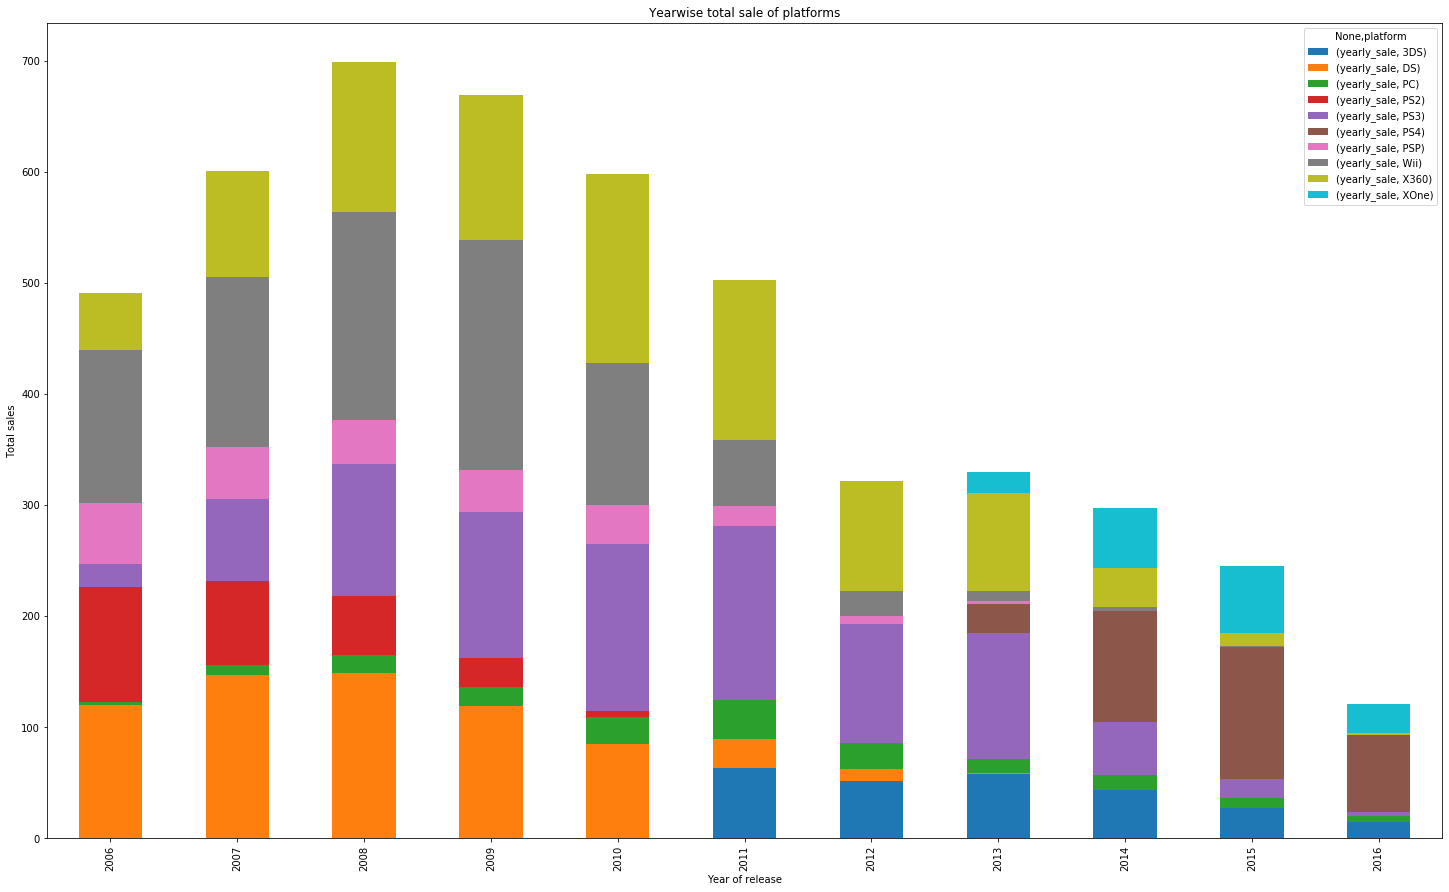

In [855]:
#df_high_platforms_y1.unstack(level=0).plot(subplots=True,kind='bar',figsize=(15, 60), layout=(10, 3))
df_high_platforms_y1.unstack(level=0).plot(kind='bar',figsize=(25, 15),stacked=True)  
plt.title("Yearwise total sale of platforms")
plt.xlabel("Year of release")
plt.ylabel("Total sales")

Text(0, 0.5, 'Total sales')

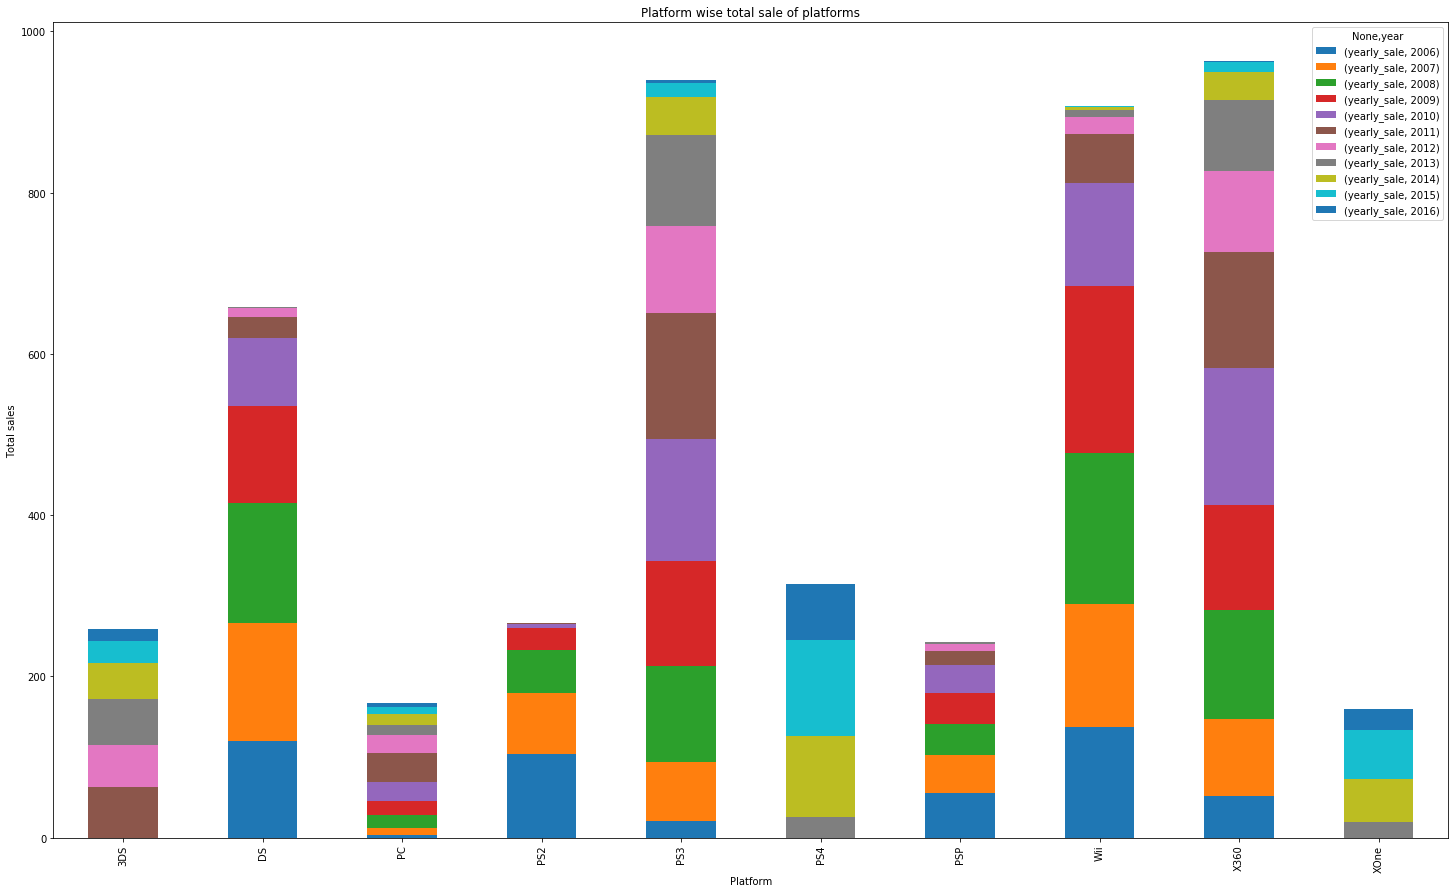

In [856]:
df_high_platforms_y1.unstack(level=1).plot(kind='bar',figsize=(25, 15),stacked=True)  
plt.title("Platform wise total sale of platforms")
plt.xlabel("Platform")
plt.ylabel("Total sales")

In [857]:
#df_high_platforms_y1.unstack(level=1).plot(subplots=True,kind='bar',figsize=(15, 60), layout=(10, 3))  

In [858]:
# GRAPH - Code worked, Commented because I am now showing using unstack() - see charts above
#df_tmp = df_high_platforms_y1.reset_index(level=1)

#for tmp_platform in df_high_platforms_stats.index:
#       tmp = df_tmp.loc[tmp_platform]
#       tmp.plot(kind='bar',x='year', y='yearly_sale',title=tmp_platform)     


In [859]:
tmp = df_high_platforms_stats.combine_first(df_high_platforms_y1)
tmp = tmp.reset_index(level='year')
tmp=tmp.reset_index()

In [860]:
df1= tmp.groupby(['platform']).last().reset_index()
df1.columns=['platform','year_last','total_sales','year_last_sale']
df1

,platform,year_last,total_sales,year_last_sale
0,3DS,2016,259.00,15.14
1,DS,2013,658.69,1.54
2,PC,2016,167.18,5.25
3,PS2,2011,265.80,0.45
4,PS3,2016,939.65,3.60
5,PS4,2016,314.14,69.25
6,PSP,2015,243.15,0.12
7,Wii,2016,907.51,0.18
8,X360,2016,963.17,1.52
9,XOne,2016,159.32,26.15


In [861]:
df2= tmp.groupby(['platform']).first().reset_index()
df2.columns=['platform','year_first','total_sales','year_first_sale']
df2

,platform,year_first,total_sales,year_first_sale
0,3DS,2011,259.00,63.20
1,DS,2006,658.69,119.81
2,PC,2006,167.18,2.85
3,PS2,2006,265.80,103.42
4,PS3,2006,939.65,20.96
5,PS4,2013,314.14,25.99
6,PSP,2006,243.15,55.32
7,Wii,2006,907.51,137.15
8,X360,2006,963.17,51.62
9,XOne,2013,159.32,18.96


In [862]:
df1 = df1.combine_first(df2).sort_values(by='total_sales',ascending=False)
df1

,platform,total_sales,year_first,year_first_sale,year_last,year_last_sale
8,X360,963.17,2006.0,51.62,2016,1.52
4,PS3,939.65,2006.0,20.96,2016,3.60
7,Wii,907.51,2006.0,137.15,2016,0.18
1,DS,658.69,2006.0,119.81,2013,1.54
5,PS4,314.14,2013.0,25.99,2016,69.25
3,PS2,265.80,2006.0,103.42,2011,0.45
0,3DS,259.00,2011.0,63.20,2016,15.14
6,PSP,243.15,2006.0,55.32,2015,0.12
2,PC,167.18,2006.0,2.85,2016,5.25
9,XOne,159.32,2013.0,18.96,2016,26.15


In [863]:
df1['GrowingShrinking'] = np.where(df1.year_last_sale>df1.year_first_sale, 'Growing','Shrinking')
display(df1.sort_values(by='GrowingShrinking'))

,platform,total_sales,year_first,year_first_sale,year_last,year_last_sale,GrowingShrinking
5,PS4,314.14,2013.0,25.99,2016,69.25,Growing
2,PC,167.18,2006.0,2.85,2016,5.25,Growing
9,XOne,159.32,2013.0,18.96,2016,26.15,Growing
8,X360,963.17,2006.0,51.62,2016,1.52,Shrinking
4,PS3,939.65,2006.0,20.96,2016,3.60,Shrinking
7,Wii,907.51,2006.0,137.15,2016,0.18,Shrinking
1,DS,658.69,2006.0,119.81,2013,1.54,Shrinking
3,PS2,265.80,2006.0,103.42,2011,0.45,Shrinking
0,3DS,259.00,2011.0,63.20,2016,15.14,Shrinking
6,PSP,243.15,2006.0,55.32,2015,0.12,Shrinking


**CONCLUSION**

*  The Growing/Shrinking bar charts is displayed.

*  The overall Growing/Shrinking based on first and last year sale is displayed.

*  This shows that the platforms that started in 2006 have already shrunk (10 year lifecycle over)
*  The only platforms PS4, XOne with significant sales started in 2013. Their sale is also going down and may be replaced in 2 years based on the bar graphs.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


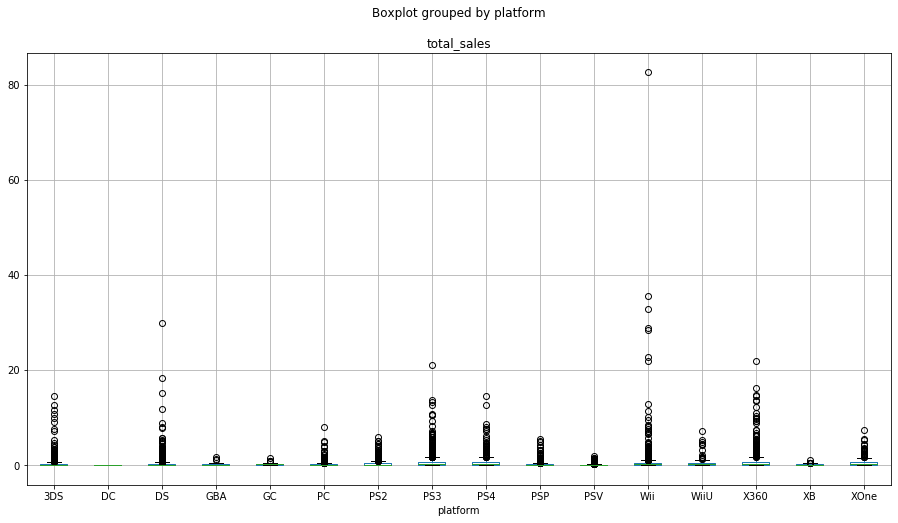

In [864]:
#Build a box plot for the global sales of all games, broken down by platform.
#Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
#Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
#Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
#Keeping your conclusions in mind, compare the sales of the same games on other platforms.
#Take a look at the general distribution of games by genre. 
#What can we say about the most profitable genres? Can you generalize about genres with high and low sales?
df_games_sample.boxplot(column='total_sales',by='platform',figsize=(15,8))

10375 0.9886601867733943


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


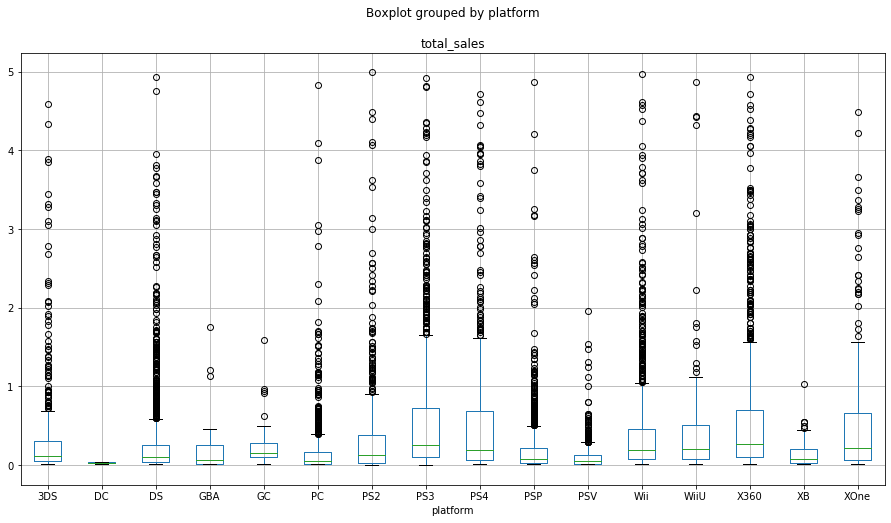

In [865]:
#Boxplot for games with sales <=5M
df_games_sample_lo = df_games_sample.query('total_sales <=5')
print(len(df_games_sample_lo),len(df_games_sample_lo)/len(df_games_sample))
df_games_sample_lo.boxplot(column='total_sales',by='platform',figsize=(15,8))

**CONCLUSION**

10375 games on platforms are generating sales of less than 5M. Thats 98% of the sample games from 2006 onwards.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


83 0.007909281494187155


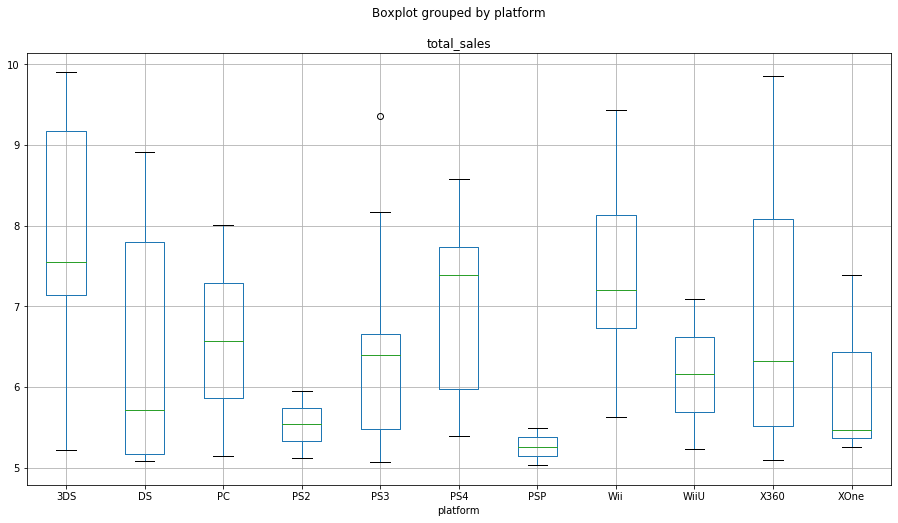

In [866]:
#Boxplot for games with sales >=5 and less than 10M
df_games_sample_hi = df_games_sample.query('total_sales >= 5 and total_sales <10')
df_games_sample_hi.boxplot(column='total_sales',by='platform',figsize=(15,8))
print(len(df_games_sample_hi),len(df_games_sample_hi)/len(df_games_sample))

**CONCLUSION**

83 games on platforms are generating sales of less than 5M. Thats .8% of the sample games from 2006 onwards.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


36 0.003430531732418525


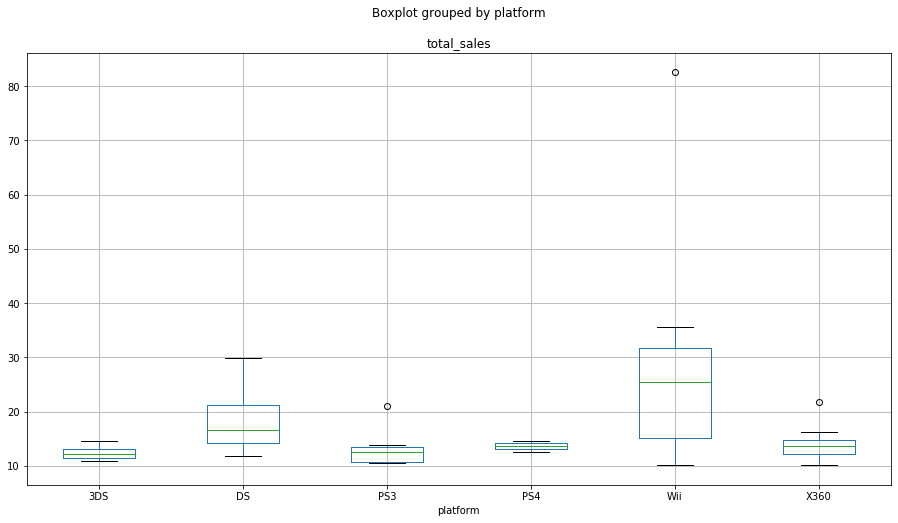

In [867]:
#Boxplot for games with sales >=10M
df_games_sample_hi2 = df_games_sample.query('total_sales >= 10')
df_games_sample_hi2.boxplot(column='total_sales',by='platform',figsize=(15,8))
print(len(df_games_sample_hi2),len(df_games_sample_hi2)/len(df_games_sample))

**CONCLUSION**

36 games on platforms are generating sales of greater than 10M. Thats .3% of the sample games from 2006 onwards. Wii has the most sales crossing over 80M.

**CONCLUSION**

Differences in sales are significant. Wii has the highest sales crossing over 80M for games.
Most games on platforms are generating sales of less than 5M.


In [868]:
#Take a look at how user and professional reviews affect sales for one popular platform (you choose).
#I choose PS2 as the evaluation platform since it has the most sales and keeps on growing to PS3, PS4.
df_games_ps2 = df_games.query('platform == "PS2"')
print('Total PS2 games',len(df_games_ps2), len(df_games_ps2)/len(df_games))
display(df_games_ps2)

Total PS2 games 2161 0.12928507328746636


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,old_rating,year_of_release_old,factor,old_user_score,factor_user,old_critic_score,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,90.0,M,M,2004,"(89.5, 98.0]",90.0,"(87.3, 97.0]",95.0,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,87.0,M,M,2002,"(89.5, 98.0]",87.0,"(77.6, 87.3]",95.0,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,84.0,E,E,2001,"(89.5, 98.0]",84.0,"(77.6, 87.3]",95.0,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,85.0,M,M,2001,"(89.5, 98.0]",85.0,"(77.6, 87.3]",97.0,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,85.0,E,E,2004,"(81.0, 89.5]",85.0,"(77.6, 87.3]",89.0,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN,0.01
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN,0.01


In [869]:
df_games_ps2.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,year_of_release_old,old_user_score,old_critic_score,total_sales
year_of_release,1.000000,-0.152744,-0.203809,-0.104431,0.007867,-0.085133,-0.069153,0.038723,-0.094191,-0.099743,-0.158483
na_sales,-0.152744,1.000000,0.654672,0.197182,0.566580,0.382492,0.199972,-0.012679,0.171479,0.397260,0.920762
eu_sales,-0.203809,0.654672,1.000000,0.224017,0.307067,0.290340,0.149554,-0.015673,0.124203,0.301020,0.781918
jp_sales,-0.104431,0.197182,0.224017,1.000000,0.175200,0.211421,0.160411,0.008861,0.147344,0.218333,0.398318
other_sales,0.007867,0.566580,0.307067,0.175200,1.000000,0.207473,0.089966,0.000887,0.074037,0.212810,0.714651
critic_score,-0.085133,0.382492,0.290340,0.211421,0.207473,1.000000,0.626653,-0.007087,0.590442,1.000000,0.382344
user_score,-0.069153,0.199972,0.149554,0.160411,0.089966,0.626653,1.000000,-0.004878,1.000000,0.605229,0.201800
year_of_release_old,0.038723,-0.012679,-0.015673,0.008861,0.000887,-0.007087,-0.004878,1.000000,-0.009570,-0.008058,-0.009632
old_user_score,-0.094191,0.171479,0.124203,0.147344,0.074037,0.590442,1.000000,-0.009570,1.000000,0.563254,0.172866
old_critic_score,-0.099743,0.397260,0.301020,0.218333,0.212810,1.000000,0.605229,-0.008058,0.563254,1.000000,0.395435


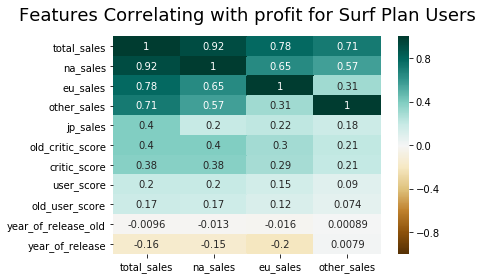

In [870]:
heatmap = sns.heatmap(df_games_ps2.corr()[['total_sales','na_sales','eu_sales','other_sales']].sort_values(by='total_sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with profit for Surf Plan Users', fontdict={'fontsize':18}, pad=16);

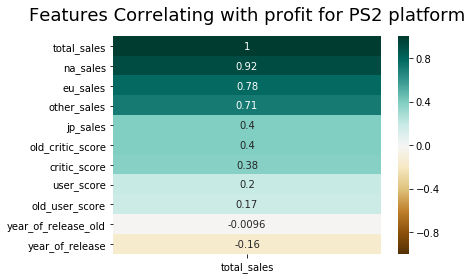

In [871]:
df_games_ps2.corr()
heatmap = sns.heatmap(df_games_ps2.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with profit for PS2 platform', fontdict={'fontsize':18}, pad=16);

In [872]:
df_games_ps2[['total_sales','na_sales','eu_sales','other_sales','jp_sales','critic_score','user_score','rating']].corr().unstack().sort_values(ascending=False).drop_duplicates()

user_score    user_score      1.000000
total_sales   na_sales        0.920762
eu_sales      total_sales     0.781918
total_sales   other_sales     0.714651
na_sales      eu_sales        0.654672
critic_score  user_score      0.626653
other_sales   na_sales        0.566580
total_sales   jp_sales        0.398318
na_sales      critic_score    0.382492
critic_score  total_sales     0.382344
eu_sales      other_sales     0.307067
              critic_score    0.290340
jp_sales      eu_sales        0.224017
critic_score  jp_sales        0.211421
              other_sales     0.207473
total_sales   user_score      0.201800
na_sales      user_score      0.199972
jp_sales      na_sales        0.197182
other_sales   jp_sales        0.175200
user_score    jp_sales        0.160411
              eu_sales        0.149554
other_sales   user_score      0.089966
dtype: float64

**CONCLUSION**

The above heatmap and correlation mapping show that 
total_sales is strongly related with --> na_sales, other_sales, eu_sales.
total_sales is less related with jp_sales, critic_score (.4)
total_sales is not related with user_score

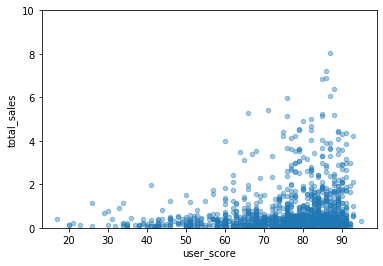

In [873]:
#df_games_ps2.plot(kind='area',y='total_sales',x='user_score')
#Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
df_games_ps2.plot.scatter(y='total_sales',x='user_score',alpha=0.4,ylim=(0,10))

**CONCLUSION**

The user_score scatter plot shows that the total_sales increase slowly as the user_score increases. After the user_score starts going above 60, the total_sales start increasing above 4M.
The total_sales rise significantly and suddenly after the user_score goes beyond 85.

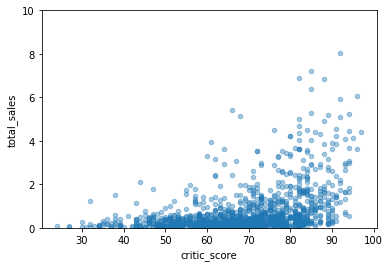

In [874]:
#Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
#ax=df_games_ps2.plot(kind='area',y='total_sales',x='critic_score')
#ax.set(xlabel='critic_score', ylabel='total_sales', title='Relationship of total_sales to critic_score') 
df_games_ps2.plot.scatter(y='total_sales',x='critic_score',alpha=0.4,ylim=(0,10))

**CONCLUSION**

The critic_score scatter plot shows that the total_sales increase slowly as the critic_score increases. After the critic_score starts going above 60, the total_sales start increasing above 4M.
The total_sales rise significantly and suddenly after the critic_score goes beyond 95.

In [875]:
#Keeping your conclusions in mind, compare the sales of the same games on other platforms.
#find games played on PS2 platform
df_names_ps2 = df_games_ps2[['name']]
df_names_ps2

,name
17,Grand Theft Auto: San Andreas
24,Grand Theft Auto: Vice City
28,Gran Turismo 3: A-Spec
38,Grand Theft Auto III
48,Gran Turismo 4
...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo
16671,Kanokon: Esuii
16683,Scarlett: Nichijou no Kyoukaisen
16689,Real Rode


In [876]:
#find other platforms where PS2 games are played
tmp = df_games_sample.query('name in @df_names_ps2.name and platform!="PS2"')
tmp

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,old_rating,year_of_release_old,factor,old_user_score,factor_user,old_critic_score,total_sales
122,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,NaN,NaN,NaN,NaN,2011,NaN,NaN,NaN,NaN,6.64
202,FIFA Soccer 11,PS3,2010,Sports,0.61,3.28,0.06,1.12,89.0,80.0,E,E,2010,"(81.0, 89.5]",80.0,"(77.6, 87.3]",89.0,5.07
204,Grand Theft Auto: Vice City Stories,PSP,2006,Action,1.70,1.99,0.16,1.18,86.0,80.0,M,M,2006,"(81.0, 89.5]",80.0,"(77.6, 87.3]",86.0,5.03
234,Guitar Hero III: Legends of Rock,Wii,2007,Misc,3.04,1.11,0.00,0.43,86.0,84.0,T,T,2007,"(81.0, 89.5]",84.0,"(77.6, 87.3]",86.0,4.58
239,Guitar Hero III: Legends of Rock,X360,2007,Misc,3.19,0.91,0.01,0.42,85.0,79.0,T,T,2007,"(81.0, 89.5]",79.0,"(77.6, 87.3]",85.0,4.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16545,Madagascar: Escape 2 Africa,PC,2008,Action,0.01,0.00,0.00,0.00,58.0,80.0,E10+,E10+,2008,"(55.5, 64.0]",80.0,"(77.6, 87.3]",58.0,0.01
16551,Winning Eleven: Pro Evolution Soccer 2007,PC,2006,Sports,0.00,0.01,0.00,0.00,88.0,84.0,E,E,2006,"(81.0, 89.5]",NaN,"(77.6, 87.3]",88.0,0.01
16559,Katekyoo Hitman Reborn! Kindan no Yami no Delta,Wii,2008,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN,0.01
16610,Kiniro no Corda 3,3DS,2015,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,0.01


In [877]:
#Keeping your conclusions in mind, compare the sales of the same games on other platforms.
print(df_games_ps2.total_sales.sum(),tmp.total_sales.sum())
tmp.pivot_table(index=['platform','name'],values='total_sales',aggfunc=['sum'])
#tmp.groupby(by=['name','platform'])['total_sales'].sum()

1255.77 550.0


sum
                                                       total_sales
platform name                                                     
3DS      Brunswick Pro Bowling                                0.12
         Culdcept                                             0.16
         Dragon Quest VIII: Journey of the Cursed King        0.86
         FIFA 12                                              0.39
         Kiniro no Corda 3                                    0.01
...                                                            ...
XB       Tomb Raider: Legend                                  0.13
         Torino 2006                                          0.04
         Urban Chaos: Riot Response                           0.01
         Van Helsing                                          0.18
         X-Men: The Official Game                             0.10

[1104 rows x 1 columns]

**CONCLUSION**
PS2 games played on PS2 platform generate sale of 1255M.
The same games played on other platforms generate sales of 877.11M.
PS2 platform is much higher in sales.


Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

,total_sales
genre,
Action,1135.62
Sports,800.11
Shooter,722.92
Misc,563.42
Role-Playing,523.49
Racing,301.07
Platform,280.30
Simulation,222.27
Fighting,188.68


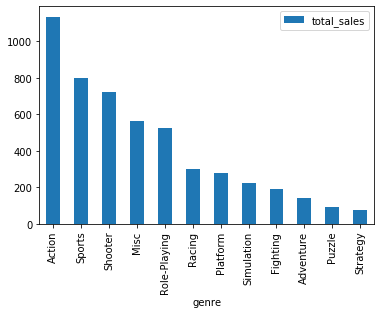

In [878]:
df_genre=df_games_sample.pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)
df_genre.plot(kind='bar')
df_genre

**CONCLUSION**

Above table shows the distribution of sales amongst various genres.
Action genre is most profitable with over 1641M in sales. Puzzle is least profitable with 155.68M in sales.

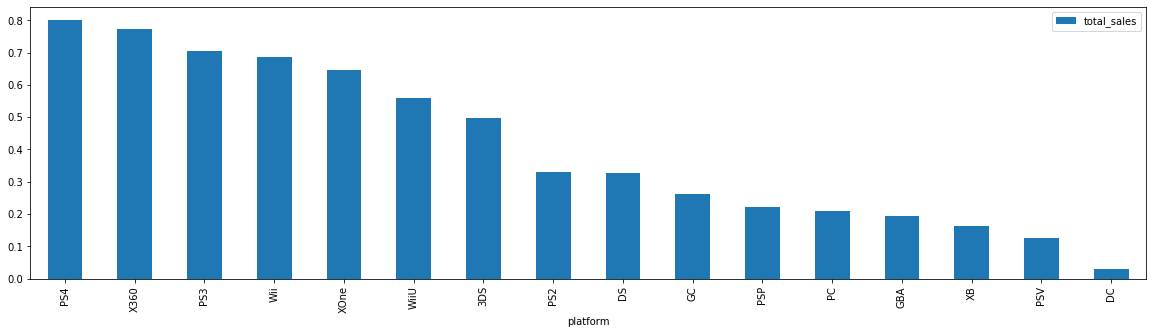

In [879]:
df_games_mean = df_games_sample.pivot_table(index='platform',values='total_sales',aggfunc='mean').sort_values(by='total_sales',ascending=False)
df_games_mean.plot(kind='bar',figsize=(20,5))

**CONCLUSION**

The above plot displays that the highest mean sale is on the platform "GB" followed by "PS4". The lowest mean sale is on PCFX.

## Step 4. Create a user profile for each region

For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.

The top five genres. Explain the difference.

Do ESRB ratings affect sales in individual regions?

,eu_sales,jp_sales,na_sales
platform,,,
X360,270.33,12.15,595.57
Wii,262.21,69.33,496.90
PS3,330.29,80.19,393.49
DS,143.47,142.04,326.08
PS2,46.28,35.93,114.89
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
3DS,61.48,100.67,83.49
PSP,55.27,71.53,82.44


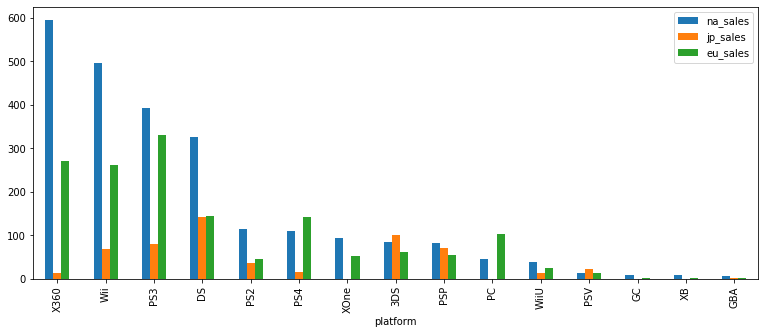

In [880]:
df_regions=  (df_games_sample
                              .pivot_table(index=['platform'],values=['na_sales','jp_sales','eu_sales'],aggfunc='sum')
                              .nlargest(15, ['na_sales','jp_sales','eu_sales'],keep='first'))
df_regions.plot(kind='bar',y=['na_sales','jp_sales','eu_sales'],figsize=(13,5))
df_regions

In [881]:
df_na = df_games_sample.pivot_table(index=['platform'],values=['na_sales'],aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
df_jp = df_games_sample.pivot_table(index=['platform'],values=['jp_sales'],aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)
df_eu  = df_games_sample.pivot_table(index=['platform'],values=['eu_sales'],aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
display(df_na,df_jp,df_eu)

,na_sales
platform,
X360,595.57
Wii,496.90
PS3,393.49
DS,326.08
PS2,114.89


,jp_sales
platform,
DS,142.04
3DS,100.67
PS3,80.19
PSP,71.53
Wii,69.33


,eu_sales
platform,
PS3,330.29
X360,270.33
Wii,262.21
DS,143.47
PS4,141.09


**CONCLUSION**

The top-5 platforms for each region are presented above. na_sales lead in most platforms. PS2, PS3 are common in all regions for high sales.

Wii is not high sale in jp_sales

3DS has very high sales in jp_sales, and lower sale in other regions.

,eu_sales,jp_sales,na_sales
genre,,,
Action,356.98,103.00,540.08
Sports,252.69,49.36,400.76
Shooter,241.09,19.43,376.08
Misc,148.28,65.62,290.41
Role-Playing,110.79,170.84,200.01
Platform,82.10,35.20,134.33
Racing,114.48,13.24,133.56
Simulation,69.76,23.47,109.12


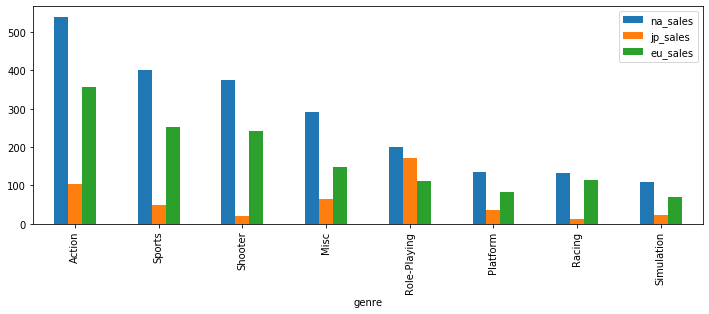

In [882]:
df_regions= (df_games_sample
                              .pivot_table(index=['genre'],values=['na_sales','jp_sales','eu_sales'],aggfunc='sum')
                              .nlargest(8, ['na_sales','jp_sales','eu_sales'],keep='first'))
 
df_regions.plot(kind='bar',y=['na_sales','jp_sales','eu_sales'],figsize=(12,4))
df_regions


In [883]:
df_na = df_games_sample.pivot_table(index=['genre'],values=['na_sales'],aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
df_jp = df_games_sample.pivot_table(index=['genre'],values=['jp_sales'],aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)
df_eu  = df_games_sample.pivot_table(index=['genre'],values=['eu_sales'],aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
display(df_na,df_jp,df_eu)

,na_sales
genre,
Action,540.08
Sports,400.76
Shooter,376.08
Misc,290.41
Role-Playing,200.01


,jp_sales
genre,
Role-Playing,170.84
Action,103.00
Misc,65.62
Sports,49.36
Platform,35.20


,eu_sales
genre,
Action,356.98
Sports,252.69
Shooter,241.09
Misc,148.28
Racing,114.48


**CONCLUSION**

The top-5 genres for sales in different regions are listed above.

Action, Sports and Misc are in top-5 sales in all 3 regions.

Shooter has high sales in na_sales and eu_sales

Role_playing is the most sold in jp_sales

,eu_sales,jp_sales,na_sales
rating,,,
E,466.36,122.19,809.08
M,412.83,46.30,588.67
T,244.88,90.16,439.76
E10+,183.38,36.94,328.58
EC,0.00,0.00,1.32
RP,0.08,0.00,0.00


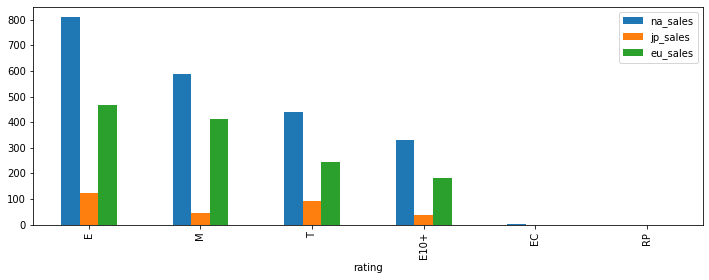

In [884]:
#Do ESRB ratings affect sales in individual regions?
df_regions= (df_games_sample
                              .pivot_table(index=['rating'],values=['na_sales','jp_sales','eu_sales'],aggfunc='sum')
                              .nlargest(8, ['na_sales','jp_sales','eu_sales'],keep='first'))
 
df_regions.plot(kind='bar',y=['na_sales','jp_sales','eu_sales'],figsize=(12,4))
df_regions


**CONCLUSION**
The ESRB ratings do affect sales in different regions.

Ratings of E,T,M,E-10+ are the top-3 sales in the regions.
Other ratings have very low sales.


## Step 5. Test the following hypotheses:

In [885]:
#—Null Hypothesis 
#Average user ratings of the Xbox One and PC platforms are the same.

df_xbox = df_games.query('platform=="XOne"')[['user_score']]
df_pc = df_games.loc[df_games['platform']=='PC'][['user_score']]
mean_xbox = df_xbox.user_score.mean()
mean_pc = df_pc.user_score.mean()
print('mean xbox:',mean_xbox, ', mean pc:',mean_pc)

mean xbox: 65.13978494623656 , mean pc: 70.64450127877238


In [886]:
#Sample size and variance
print('size of xbox:',len(df_xbox),', size of pc:',len(df_pc))
print('variance of xbox:', df_xbox.var(),', variance of pc',df_pc.var())

size of xbox: 247 , size of pc: 974
variance of xbox: user_score    189.364138
dtype: float64 , variance of pc user_score    232.116737
dtype: float64


**Important Note:**

The equal-variance (Student) t-test itself is merely an (ill-understood) approximation when the population sample variances are unequal. Therefore, unless it is known that the population variances are equal, it is better to use an approximation to the correct sampling distribution (the Welch-Satterthwaite) than to use a perfectly accurate distribution that does not apply to the data model.

Hence we use Welch's t-test instead of Student's t-test

In [887]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

#Since the size and variances of the statistical populations from which the sample is taken
#are not equal, we need to set the 'equal_var' parameter to False
results = st.ttest_ind(
        df_xbox, 
        df_pc,nan_policy='omit',equal_var=False)

p_value = results.pvalue
print('p-value: ', p_value)

if (p_value < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  2.4918125190266047e-06
We reject the null hypothesis


**CONCLUSION**

The hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

We reject the null hypothesis since the p_value is much less than alpha (0.05)

Used the significance level of 0.05 because based on xbox and pc mean values which are different by a score of 5 (.5), finding has a five percent (.05) chance of not being true, which is the converse of a 95% chance of being true.

In [888]:
#Step 5. Test the following hypotheses:
#—Alternative Hypothesis: 
#Average user ratings for the Action and Sports genres are different.

df_action = df_games.loc[df_games['genre']=='Action'][['user_score']]
df_sports = df_games.loc[df_games['genre']=='Sports'][['user_score']]
mean_action = df_action.user_score.mean()
mean_sports = df_sports.user_score.mean()
mean_action, mean_sports

(69.14929025942241, 68.35196374622356)

In [889]:
#Sample size and variance
print('size of action:',len(df_action),'size of sports:',len(df_sports))
print('variance of action:', df_action.var(),'variance of sports',df_sports.var())

size of action: 3369 size of sports: 2348
variance of action: user_score    207.657917
dtype: float64 variance of sports user_score    250.480714
dtype: float64


**Important Note:**

Since the variances of the statistical populations from which the sample is taken are not equal, we need to set the 'equal_var' parameter to False. That means we use Welch's t-test instead of Student's t-test

In [890]:
alpha = .01 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        df_action, 
        df_sports,nan_policy='omit',equal_var=False)

p_value = results.pvalue
print('p-value: ', p_value)

if (p_value < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.13939681727912928
We can't reject the null hypothesis


**CONCLUSION**

Our null hypothesis:  Average user ratings for the Action and Sports genres are same. This is seen because the mean user_score  of the two genres Action and Sport differs by 1 point.

Alternative hypothesis to prove: Average user ratings for the Action and Sports genres are different.

Used the significance level of 0.01 because based on mean values which are different by a score of 1 (.5), finding has a one percent (.01) chance of not being true, which is the converse of a 99% chance of being true.

We can't reject the null hypothesis since the p_value is higher than alpha (0.01). Hence we cannot accept the Alternative Hypothesis that "Average user ratings for the Action and Sports genres are different."  

Since we failed to reject the null hypothesis, we would not accept the alternative hypothesis.


Datatypes: year of release should be changed to int or timedate year

Missing Values:

* 2 records have "name", genre missing. Need to check if same records.

* critic_score: 51% values missing. Used user_score to fill critic_score.

*  user_score is in range of 0-10, whereas critic_score is in range of 0-100. Converted to 0-100 by multiplying with 10.

* user_score is tbd in 2424 records, which is approximately 14% of total records.

* This may be that users just bought the item and the seller is expecting them to report a rating in the next 1 month. 

*  The sellers usually send emails for a few weeks to the customers to get their feedback.

*  user_score: 40% records missing. Used critic_score to fill user_score.  User score has 'tbd' which was changed to Nan and then replaced using critic_score.

*  Missing year was replaced using the year_of_release value for similar platform that had the information for year_of_release. 

* rating: 40% records missing data. Filled using record with same game_name that had the rating.

* This missing data is reasonable because many people who purchase don't submit reviews. I myself don't submit reviews or rating for products that I buy.

*  Replaced name, genre with 'unknown' for Nan Values (only two rows). I didn't remove these records because they have sales associated with them.


500 or more games sold from 2002 onwards. Sales were most in 2009 - 2011 Very low volume till 1995. Not many video games were available at that time.

PIE CHARTS for the yearly distribution of sales in different platforms 

PLATFORM LIFETIME

*  Only two platforms have zero total_sales in 2008: PS2 and PS3.

* Sales started going down for PS2 around 2007. This may be the time when PS3 was going to come.

*  The PS2 started selling in 2000 and peaked in 2002. Then the sale started going down in 2007, and eventually zeroing in 2010. 10 year cycle.

*  Sales started going down for PS3 around 2012. This may be the time when next version was going to come.

*  PS3 started selling in 2006, peaked in 2011, and dropped to almost zero in 2016. 10 year cycle.

*  Hence the products have approximately 10 year cycle from start to end, new version comes and the old one stops selling.

DATA SAMPLING
*  The distribution plots, and the 2*sigma values show that we can take sampling from year_of_release 1995 onwards. The sales started rising in 1995. We can then use this data to extrapolate for future years. 

*  We need to start from 2006 because some of the platforms that started in 1995 are already dead by 2005. We need to evaluate the lifecycle of future platforms.

*  Disregarded the data prior to 2006.

CORRELATION BETWEEN TOTAL SALES and CRITIC SCORE, USERSCORE

*  The heatmap and correlation mapping showed that total_sales is strongly related with --> na_sales, other_sales, eu_sales. total_sales is less related with jp_sales, critic_score (.4) total_sales is not related with user_score

*  The user_score scatter plot shows that the total_sales increase slowly as the user_score increases. After the user_score starts going above 60, the total_sales start increasing above 4M. The total_sales rise significantly and suddenly after the user_score goes beyond 85.

*  The critic_score scatter plot shows that the total_sales increase slowly as the critic_score increases. After the critic_score starts going above 60, the total_sales start increasing above 4M. The total_sales rise significantly and suddenly after the critic_score goes beyond 95.

PS2 games played on PS2 platform generate sale of 1255M. The same games played on other platforms generate sales of 877.11M. PS2 platform is much higher in sales.

The high sale growing platforms are PS4, XOne. However they will reach end of cycle soon since their bar graph shows sales going down from the highest peak. Their sale is still higher from the time they were released.

Action genre is most profitable with over 1641M in sales. Puzzle is least profitable with 155.68M in sales.

The highest mean sale is on the platform "GB" followed by "PS4". The lowest mean sale is on PCFX.

The top-5 platforms for each region:

*  na_sales lead in most platforms. PS2, PS3 are common in all regions for high sales.

*  Wii is not high sale in jp_sales. 

*  3DS has very high sales in jp_sales, and lower sale in other regions.

The top-5 genres for sales in different regions:

*  Action, Sports and Misc are in top-5 sales in all 3 regions.

*  Shooter has high sales in na_sales and eu_sales

*  Role_playing is the most sold in jp_sales

The ESRB ratings do affect sales in different regions.

*  Ratings of E,T,M,E-10+ are the top-3 sales in the regions. Other ratings have very low sales.

The hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

*  We reject the null hypothesis since the p_value is much less than alpha (0.05)

Alternative hypothesis to prove: Average user ratings for the Action and Sports genres are different. Our null hypothesis: Average user ratings for the Action and Sports genres are same.

*  We can't reject the null hypothesis since the p_value is higher than alpha (0.01). Hence we cannot accept the Alternative Hypothesis that "Average user ratings for the Action and Sports genres are different."

*  Since we failed to reject the null hypothesis, we would not accept the alternative hypothesis.




### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [X]  files explored (info() method)
- [x]  Replace the column names (make them lowercase).
- [X]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [X]  decided how to deal with missing values and reasoning
- [X]  calculated and displayed: the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
- [X]  Observation and findings: games released in different years. 
- [X]  Observation and findings: sales relationship to platform, platforms with the greatest total sales, distribution based on data for each year. 
- [X]  Observation and findings: platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- [X]  Observation and findings: Period used for data sampling (1995 onwards). Build a prognosis for 2017.
- [X]  Observation and findings:  platforms are leading in sales, growing or shrinking, several potentially profitable platforms
- [X]  Observation and findings: average sales on various platforms and boxplots.
- [X]  Observation and findings: how user and professional reviews affect sales for one popular platform (PS2). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- [X]  Observation and findings: compare the sales of the same games (PS2) on other platforms.
- [X]  Observation and findings: general distribution of games by genre, most profitable genres, generalize about genres with high and low sales.
- [X]  Observation and findings: For each region (NA, EU, JP), determine: The top five platforms. Describe variations in their market shares from region to region.
- [X]  Observation and findings: For each region (NA, EU, JP), determine: The top five genres. Explain the difference.
- [X]  Observation and findings: For each region (NA, EU, JP), determine: Do ESRB ratings affect sales in individual regions?
- [x]  task completed: "the null hypothesis for difference in profit of surf and ultimate plan users"
- [x]  task completed: "the null hypothesis for Average user ratings of the Xbox One and PC platforms are the same"
- [x]  task completed: "the alternative hypothesis for Average user ratings for the Action and Sports genres are different."
- [x]  task completed: "Which factors have had the biggest influence on the profit generation.
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn

Thank you for reviewing my integrated project. Respectfully looking forward to your feedback. 